In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Operations with Numpy Arrays

Numpy arrays are extremely useful when working with large datasets since you can perform all of the typically used mathematical operations (addition, subtraction, division, multiplication, exponentiation, etc.) on all of the elements in these arrays at once. When you are given two numpy arrays, you can also add, subtract, divide, or multiply them together elementwise. These are special properties of numpy arrays that cannot be replicated using lists (that are not implicity coverted to numpy arrays). 

In [2]:
# lists
m = [2, 5] 
n = [3, 4]

print(m+n) # appends them together 
print(m-n) # throws an error because this is not defined

[2, 5, 3, 4]


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [3]:
# numpy arrays 
k = np.array([2, 2])
l = np.array([3, 1])

#elementwise operations
print(k+l)
print(l-k)
print(k*l)
print(k/l) # note: returns floats!

[5 3]
[ 1 -1]
[6 2]
[0.66666667 2.        ]


In [4]:
print(l)
print(np.exp(l)) # e^(elements of l)

print(np.cos(l)) #computes cosine of angles provided in radians, can take a single value or array as input
print(np.sin(l)) #computes sine of angles provided in radians, can take a single value or array as input

[3 1]
[20.08553692  2.71828183]
[-0.9899925   0.54030231]
[0.14112001 0.84147098]


If you try to perform operations with numpy arrays of different sizes (or with a numpy array and an integer/float), numpy will automatically expand the dimensions of the smaller array to match the larger array (this is termed "broadcasting"). Specifically, numpy will replicate integers/floats until they match the length of the longer array in order to perform elementwise operations. Likewise, if the dimensions of the smaller array agree in at least one dimension of the larger array (i.e. 2x2 for the larger array and 1x2 for the smaller array or similarly, a 2x2 array and 2x1 array), the smaller arrray will be replicated row-wise/column-wise to match the dimensions of the larger array. This eliminates additional steps since you can achieve this without explicit reshaping or looping.

However, if you did not intend to produce and combine arrays of different sizes, it can be harder to catch the error, especially in intermediate coding steps, as numpy will not throw errors unless you cannot broadcast the smaller array in a reasonable way. See below for examples of broadcasting:

In [5]:
# numpy will broadcast the constant (const)
a = np.array([1,2,3,4,5])
const = 2.

#const broadcast to np.array([2., 2., 2., 2.,2.])
print(a+const) 
print(a/const)

[3. 4. 5. 6. 7.]
[0.5 1.  1.5 2.  2.5]


In [6]:
b = np.array([[1, 2], [3, 4]])
c = np.array([10, 20])

#c broadcast to np.array([10,20], [10,20])
print(b + c) 
print(b/c)

[[11 22]
 [13 24]]
[[0.1 0.1]
 [0.3 0.2]]


In [7]:
#reminder: b = np.array([[1, 2], [3, 4]])
d = np.array([[10], [20]])

#d broadcast to np.array([10,10], [20,20])
print(b + d) 
print(b/d)

[[11 12]
 [23 24]]
[[0.1  0.2 ]
 [0.15 0.2 ]]


In [8]:
# but if there is no reasonable way to broadcast, you will get an error
#reminder: b = np.array([[1, 2], [3, 4]])
e = np.array([1, 2, 3])

print(b+e)

ValueError: operands could not be broadcast together with shapes (2,2) (3,) 

# Array Generation Functions with Specific Use Cases

When you want evenly spaced points, whether it is to make mock data from a model or to define bins for a dataset (among many other use cases), you will likely use one of the following functions:

1. np.arange is used to produce an array between a starting and stopping value that counts by the value set by step. It is basically the same as np.range but produces a numpy array instead of a list. 

2. np.linspace is a popular choice for linear spaced bins and is defined by a start value, stop value and the number of values in total you would like to have returned in an array.

3. np.logspace works similarly to np.linspace but produces values evenly spaced in log space and takes in the exponents (i.e., 1 -> 10^1, 10 --> 10^10) as the start and stop values.

In [9]:
np.arange(0, 10, step=3) # generates list between 0 and 10 stepping by 3 (if you don't specify a step, the default is step-1)

array([0, 3, 6, 9])

In [10]:
np.linspace(1,10,20) # generates array of 20 numbers evenly spaced (linearly) between 1 to 10

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [11]:
np.logspace(1, 10, 20)  #generates array of 20 numbers evenly spaced in log space between 10^(1) to 10^(10)

array([1.00000000e+01, 2.97635144e+01, 8.85866790e+01, 2.63665090e+02,
       7.84759970e+02, 2.33572147e+03, 6.95192796e+03, 2.06913808e+04,
       6.15848211e+04, 1.83298071e+05, 5.45559478e+05, 1.62377674e+06,
       4.83293024e+06, 1.43844989e+07, 4.28133240e+07, 1.27427499e+08,
       3.79269019e+08, 1.12883789e+09, 3.35981829e+09, 1.00000000e+10])

np.repeat can be used to repeat a single value or elements of an array any specific number of times. See below:

In [12]:
print(np.repeat(1, 10)) #repeats the value 1 10 times

print(np.repeat([1,2], 10)) # repeats 1 10 times, then 2 10 times

[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


np.zeros is used to produce an array of a defined size that is filled by zeros. This is often a placeholder/pre-defined and then used to store the results of computations later. 

np.ones works exactly like np.zeros but fills the array with ones instead of zeros. This is often used to define an identity matrix but can serve other purposes.

In [13]:
print(np.zeros((2,2))) #generates an array filled with zeros with the size set by (2 rows, 2 columns) 

print(np.ones((2,2))) #generates an array filled with ones with the size set by (2 rows, 2 columns) 

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]


np.random.normal samples the normal distribution with the provided mean and standard deviation a specified number of times. It is often used to generate random gaussian noise.

In [14]:
np.random.normal(0, 1, size=20) # generates array of 20 pts from normal distribution with mean 0 and standard deviation 1

array([ 1.58614806, -0.30262468,  1.48193656, -0.00265194,  0.90365737,
        1.36415897, -0.10096362,  0.74931598, -1.09891796,  1.81196648,
       -0.50572429, -0.31474183,  0.48438693,  0.92836454, -1.77972344,
        0.15222405,  1.4096955 , -1.61485414,  0.81030505,  1.09717998])

# Plotting in Matplotlib

Matplotlib is commonly the package used to generate scientific plots. Plots often share the same typical set-up and utilize the following functions frequently: 

1. plt.figure is used to define any empty figure canvas. You can feed arguments like figsize to plt.figure to set the figure size/other attributes.
2. plt.scatter is used to plot scatter points 
3. plt.plot can be used to plot lines/points (if you set a marker but set linestyle="").
5. plt.xlabel/plt.ylabel is used to label the x and y axes. 
6. plt.title sets the title of the entire plot.
7. plt.legend defines a legend for the plot. This will take any labels defined in plt.plot/plt.scatter and present them alongside with the associated style of the points/lines.

Common arguments you can adjust in matplotlib:
1. linestyle: you can decide between a connected line ("-"), dashed line ("--"), no line (""), etc.
2. marker: you can chose between a point ("."), star ("*"), etc. to mark your points.
3. markersize: adjusts the size of the marker on the plot
4. color: you can chose the color of the points/line plotted; matplotlib has a large selection of pre-defined colors and will also take hex codes. 
5. label: you can label points/lines to describe what they represent and when you define a legend, these labels will be used as the description. 
6. fontsize: controls the textsize

Latex syntax in matplotlib: You can write in latex syntax within matplotlib labels using the syntax r"$\$insert \; latex\; text \;here\$$".

In [15]:
# generating sample data 
x = np.linspace(1, 100, 50)
y = np.linspace(1, 100, 50)

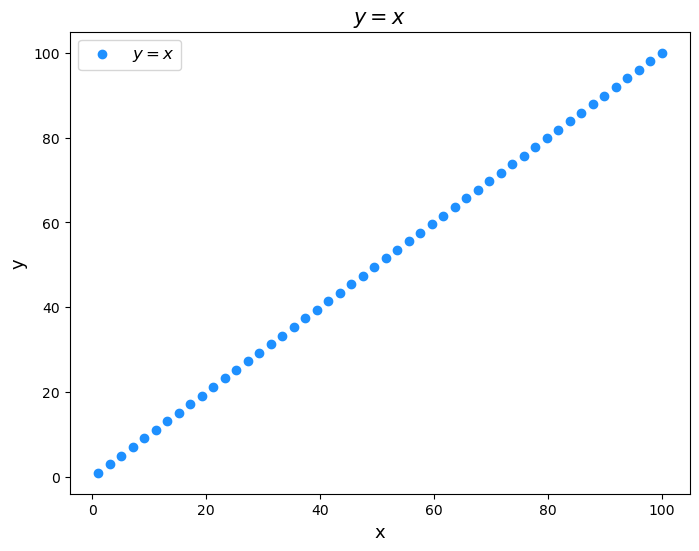

In [ ]:
plt.figure(figsize=(8,6)) #defines a figure and sets the figure size

plt.scatter(x, y, color="dodgerblue", label=r"$y=x$") # to plot scatter plots 

plt.xlabel("x", fontsize=13)
plt.ylabel("y", fontsize=13)
plt.legend(fontsize=12)
plt.title(r"$y=x$", fontsize=15)
# save the figure to a png
# dpi sets the resolution (higher is better, but a larger filesize)
plt.savefig("example_plot.png", dpi=300)
plt.show() # you need this when working in a script; not needed in a notebook
# note: if you just want to save a figure but not display it, use 
# plt.savefig() followed by plt.close()

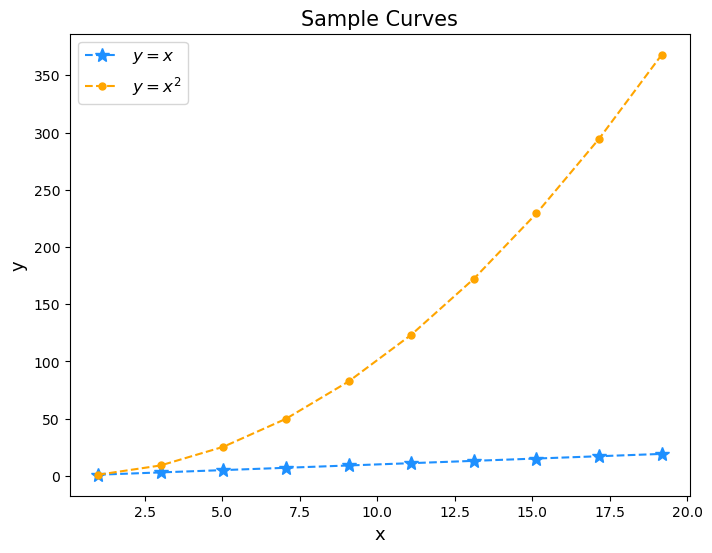

In [17]:
# plotting two curves on the same plot
x_squared = x**2
slice_first_ten_points = np.arange(0,10) #returns values 0-9

# plots 
plt.figure(figsize=(8,6)) #define a figure and set the figure size

# you can replicate the behavior of plt.scatter with plt.plot by adjusting parameters
plt.plot(x[slice_first_ten_points],y[slice_first_ten_points], linestyle="--", marker="*", # you can slice arrays using indices to get the values of the array at those indices 
         markersize=10, color="dodgerblue", label=r"$y=x$") 

plt.plot(x[slice_first_ten_points], x_squared[slice_first_ten_points], linestyle="--", marker=".", 
         markersize=10, color="orange", label=r"$y=x^2$") 

plt.xlabel("x", fontsize=13)
plt.ylabel("y", fontsize=13)

plt.legend(fontsize=12)
plt.title("Sample Curves", fontsize=15)
plt.show()

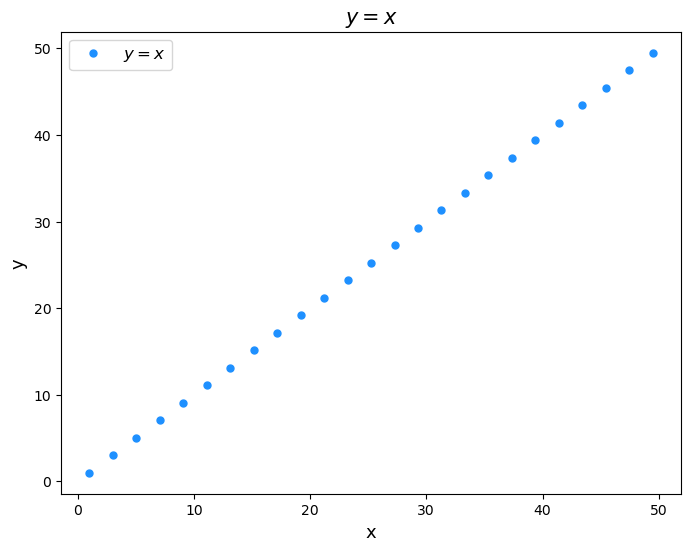

In [18]:
less_than_50 = np.where(x<50) # returns indices where x < 50 

plt.figure(figsize=(8,6)) #define a figure and set the figure size
plt.plot(x[less_than_50], y[less_than_50], color="dodgerblue", marker=".", markersize=10, linestyle="", label=r"$y=x$") # to plot a line
plt.xlabel("x", fontsize=13)
plt.ylabel("y", fontsize=13)
plt.legend(fontsize=12)
plt.title(r"$y=x$", fontsize=15)
plt.show()

## Object-oriented plotting

The above syntax, using plt.<function name> for everything, works fine for simple plots. But if you want to make more complicated plots with multiple panels, or adjust the style of individual elements, we recommend a different approach. With the object-oriented method, you first create separate objects for the figure (which encompasses all the elements of the plot) and the axes (essentially just one panel of the plot). The basic form goes like this:

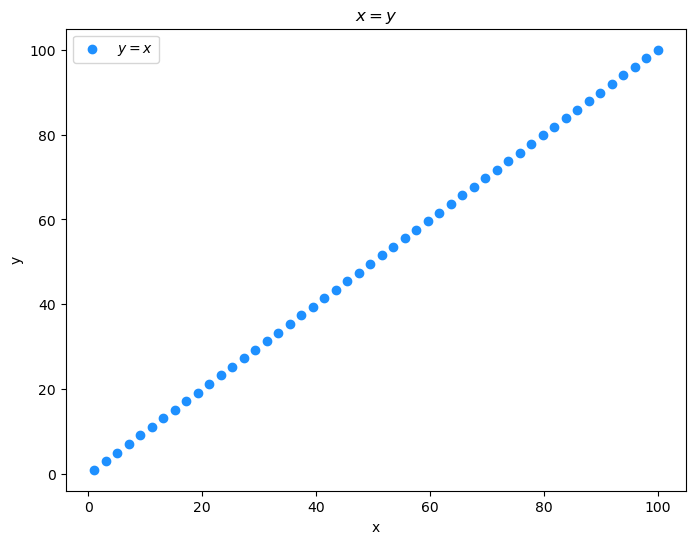

In [20]:
fig, ax = plt.subplots(figsize=(8,6)) # generate figure and axes objects
ax.scatter(x, y, color="dodgerblue", label=r"$y=x$") # or ax.scatter, ax.imshow, or other plotting methods
# label your axes! Note the slightly different wording of these methods
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(r"$x=y$")
# you can attach the legend to the axes, using ax.legend,
# or attach it to the figure using fig.legend (helpful if you have multiple panels)
ax.legend()
plt.show()

Subplots are used to make multipanel figures. They operate in the same way as typical matplotlib figures but with slight variations:
1. plt.figure is exchanged for plt.subplots: Since a multipanel figure has more than one set of x and y axes, we use plt.suplots to define the grid of subplots as well as get their individual axes. Specifically, plt.subplots will return both the overall figure object as well as all of the axes associated with the grid of subplots. Axes can be indexed by their location in the grid of total individual subplots (i.e. 2x2 figure can be indexed as axs[0,0], axs[0,1], axs[1,0], and axs[1,1]). If you have 1xn or nx1 total subplots, you will index the axs 0 through n-1 (i.e. axs[0], axs[n-1]). 
2. plt.scatter is exchanged for axs[index_i, index_j].scatter 
3. plt.plot is exchanged for axs[index_i, index_j].plot
4. plt.xlabel/plt.ylabel is exchanged for axs[index_i, index_j].set_xlabel or axs[index_i, index_j].set_ylabel
5. plt.xlim/plt.ylim is exchanged for axs[index_i, index_j].set_xlim or axs[index_i, index_j].set_ylim
8. plt.title is exchanged for axs[index_i, index_j].set_title 
9. plt.legend is exchanged for axs[index_i, index_j].legend 

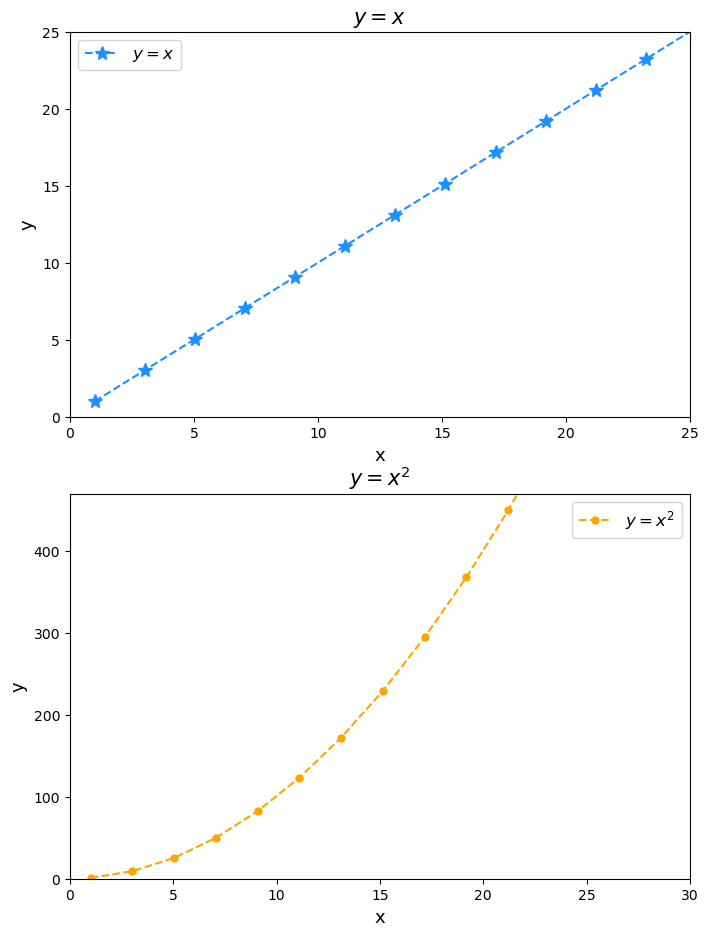

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(8,11)) # figure with 2 subplots (2 rows, 1 column)

#first axis 
axs[0].plot(x,y, linestyle="--", color="dodgerblue", marker="*", markersize=10, label=r"$y=x$") 

axs[0].set_xlabel("x", fontsize=13)
axs[0].set_ylabel("y", fontsize=13)

axs[0].set_xlim([0,25]) # set the range of values that x axis displays in ax 0 
axs[0].set_ylim([0,25]) # set the range of values that y axis displays in ax 0

axs[0].legend(fontsize=12)
axs[0].set_title(r"$y=x$", fontsize=15)

#second axis 
x_squared = x**2
axs[1].plot(x, x_squared, linestyle="--", color="orange", marker=".", markersize=10, label=r"$y=x^2$") # to plot a line

axs[1].set_xlabel("x", fontsize=13)
axs[1].set_ylabel("y", fontsize=13)

axs[1].set_xlim([0,30])
axs[1].set_ylim([0,470])

axs[1].legend(fontsize=12)
axs[1].set_title(r"$y=x^2$", fontsize=15)
plt.show()

There is a lot more you can do with matplotlib; it's a very powerful tool, if somewhat finnicky at times! The matplotlib documentation is a very useful reference for all the possible functions and arguments that are available: https://matplotlib.org/stable/index.html

# Question 1 (Numpy Exercises)

1. Create a linspace array from 0 to 2π (pi = np.pi) with 100 points.
2. Compute the sine and cosine of those points. 
3. Plot both sets of points on the same graph with different colors. Be sure to use proper labels and make a legend. 
4. Use np.where to find all the indices where $sin(x) < 0.5$. Repeat the steps to find where $cos(x) < 0.5$.
5. Plot the points where $sin(x) < 0.5$ and $cos(x) < 0.5$ making use of the arrays returned by np.where. Be sure to use proper labels and make a legend.

# Question 2 (Matplotlib Excercises)

1. Make a figure that plots $y = sin(x)$, $y=cos(x)$, $y=x^4$ (use syntax (array)**(power) to raise values to some power), and $y=e^x$ (use syntax np.exp(array)) in the same figure. Use colors and labels to distinguish between curves. Use x and y limits as appropriate to make the features of the curves visible. 
2. Make a subplot figure with 1 row and 4 columns that plots $y = sin(x)$, $y=cos(x)$, $y=x^4$, and $y=e^x$ in separate panels.
3. Generate a cloud of points with some scatter about the line $y=2x+1$ (consider using np.random.normal to achieve the scatter). Plot both the line and the scattered points in the same figure.  